In [10]:
from math import cos, sin, atan2, acos, sqrt, pi, radians
import matplotlib.pyplot as plt

In [11]:
class RobotArm2D:
    '''
    A 2D robot arm implementation using polar to cartesian conversion.
    '''
    def __init__(self):
        self.basex = 0
        self.basey = 0
        self.j1angle = 0.0
        self.j2angle = 0.0
        self.j3angle = 0.0
        self.j1length = 1.0
        self.j2length = 1.0
        self.j3length = 1.0

    def set_joint_angles(self, deg1, deg2, deg3):
        self.j1angle = radians(deg1)
        self.j2angle = radians(deg2)
        self.j3angle = radians(deg3)

    def set_joint_lengths(self, length1, length2, length3):
        self.j1length = length1
        self.j2length = length2
        self.j3length = length3

    def get_joint_angles(self):
        return self.j1angle, self.j2angle, self.j3angle

    def get_joint_lengths(self):
        return self.j1length, self.j2length, self.j3length

    def get_joint_positions(self):
        '''
        Returns the joint positions in a list of tuples.
        '''
        joint_positions = []
        x1 = self.basex + self.j1length * cos(self.j1angle)
        y1 = self.basey + self.j1length * sin(self.j1angle)
        joint_positions.append((x1, y1))

        x2 = x1 + self.j2length * cos(self.j1angle + self.j2angle)
        y2 = y1 + self.j2length * sin(self.j1angle + self.j2angle)
        joint_positions.append((x2, y2))

        x3 = x2 + self.j3length * cos(self.j1angle + self.j2angle + self.j3angle)
        y3 = y2 + self.j3length * sin(self.j1angle + self.j2angle + self.j3angle)
        joint_positions.append((x3, y3))

        return joint_positions

    def reset(self):
        self.j1angle = 0.0
        self.j2angle = 0.0
        self.j3angle = 0.0

    def get_end_effector_orientation(self):
        return self.j1angle + self.j2angle + self.j3angle

    def get_end_effector_position(self):
        '''
        Calculate the end effector position based off of forward kinematics.
        x = link1 * cos(theta1) + link2 * cos(theta1 + theta2) + ... + linkN * cos(theta1 + theta2 + ... + thetaN)
        y = link1 * sin(theta1) + link2 * sin(theta1 + theta2) + ... + linkN * sin(theta1 + theta2 + ... + thetaN)
        '''
        x = self.j1length * cos(self.j1angle) + self.j2length * cos(self.j1angle + self.j2angle) + self.j3length * cos(self.j1angle + self.j2angle + self.j3angle)
        y = self.j1length * sin(self.j1angle) + self.j2length * sin(self.j1angle + self.j2angle) + self.j3length * sin(self.j1angle + self.j2angle + self.j3angle)
        return self.basex + x, self.basey + y

In [37]:
def plot_arm(arm):
    joints = [(arm.basex, arm.basey)] + arm.get_joint_positions()
    print(joints)
    xs = [x for x, y in joints]
    ys = [y for x, y in joints]

    plt.plot(xs, ys, '-o')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.grid(True)
    plt.title("Robot Arm Configuration")
    plt.show()

[(0, 0), (6.123233995736766e-17, 1.0), (0.49999999999999994, 1.8660254037844388), (1.3660254037844386, 2.366025403784439)]


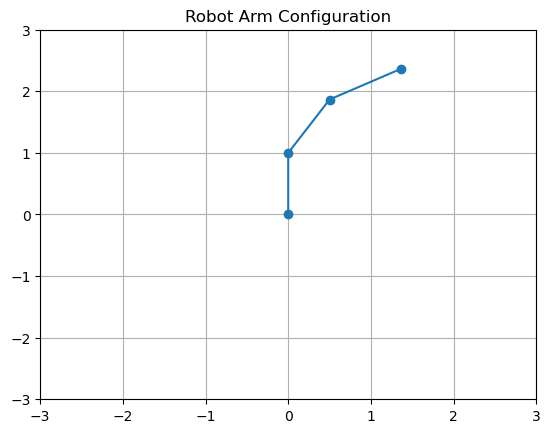

In [38]:
arm = RobotArm2D()
arm.set_joint_angles(90, -30, -30)  # example motion
plot_arm(arm)